In [1]:
#conda install -c conda-forge cuquantum-python
#!pip install requirements.txt

In [2]:
from DTC_UTIL import *

In [3]:
#Define model parameters
sq = 4
N_QUBITS = sq**2
num_cycles = 50
qubits = cirq.GridQubit.square(sq)
qubits_sq = np.reshape(qubits, [sq,sq])

In [4]:
#Set variables
theta = np.pi/2 # Rotating gates
phi = np.pi/2   #coupling gates
Rotate = Rx # Rotating gates: Rx,Ry,Rz ONLY
Coupling = ZZ # coupling gates: XX,YY,ZZ

# Define the error rates
depolarizing_error_rate = 0.01
phase_damping_error_rate = 0.01
amplitude_damping_error_rate = 0.01
Q_noise_model = QubitNoiseModel(depolarizing_error_rate, phase_damping_error_rate, amplitude_damping_error_rate)

initial_states = np.ones(N_QUBITS) ## Autocorrelate to 1


In [5]:
#Run model
floq_circuit,maxk = Circuit_list_2D(
                    THETA= theta,
                    PHI= phi,
                    qubits = qubits_sq,
                    sq = sq, 
                    cycles = num_cycles,
                    n_qubits = N_QUBITS,
                    gate_rotate = Rotate,
                    gate_coupling = Coupling
                    )
result = simulate_circuit_list(floq_circuit,maxk)
dtc_z = np.transpose(get_polarizations(result, N_QUBITS,initial_states=initial_states))

(16, 50)


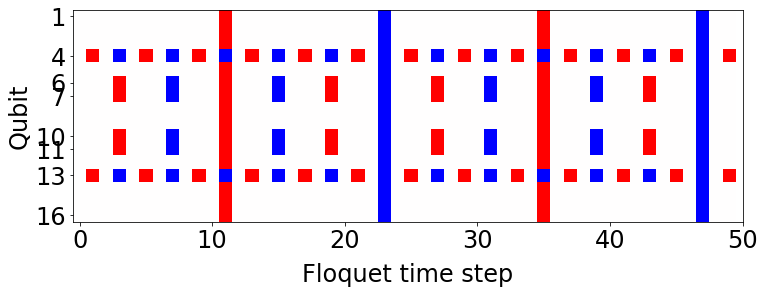

In [8]:
f = Plot_Pol(dtc_z,num_cycles,N_QUBITS)